### TITLE:  SPESIS

### Business Understanding
Goal:To build a model that predict if a patient has sepsis or notprobelem: To predict the onset sepsis early to enable timely interventions

Null Hypothesis: there is correlation between patient age and sepsis.
Alternative Hypothesis: there is no corellation between patient age and sepsis.

In [1]:
#import packages
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#transformation and imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

# check for multicollinearity using variance inflation factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#models
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             precision_score, recall_score, f1_score)


c:\Users\HP\Desktop\API\API_PROJECT\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#load the data from Kagglehub using API format


# Download latest version
path = kagglehub.dataset_download("chaunguynnghunh/sepsis")

print("Path to dataset files:", path)


data = pd.read_csv(r"C:\Users\HP\Desktop\API\API_PROJECT\data\Paitients_Files_Train.csv")
#data1 = pd.read_csv(r"C:\Users\HP\Desktop\API\API_PROJECT\kagglehub\datasets\chaunguynnghunh\sepsis\versions\2\Paitients_Files_Train.csv")
data.head()


Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\chaunguynnghunh\sepsis\versions\2


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
#check for info abput the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
#check for missing values
data.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [5]:
#check for duplicated values
data.duplicated().sum()

np.int64(0)

In [6]:
#check for statistical
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [7]:
#check for spesis distribution
sepsis_counts = data["Sepssis"].value_counts()
print(sepsis_counts)

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_12864\1205479059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = sepsis_counts.index, y= sepsis_counts.values, palette="viridis")


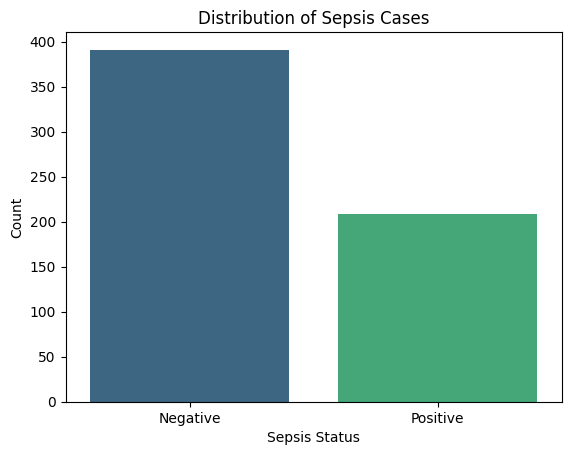

In [8]:
# UNIVARIATE ANALYSIS
#plot
sns.barplot(x = sepsis_counts.index, y= sepsis_counts.values, palette="viridis")
plt.title("Distribution of Sepsis Cases")
plt.xlabel("Sepsis Status")
plt.ylabel("Count")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\765640587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= feature, data=data, palette="viridis")


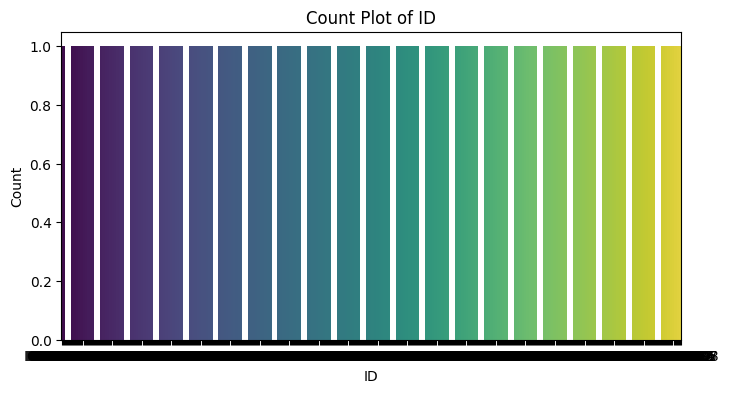

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\765640587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= feature, data=data, palette="viridis")


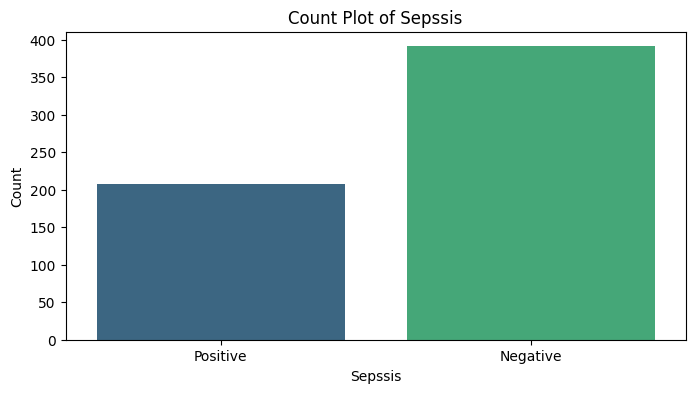

In [9]:
#visual for cateforical columns
categorical_columns = data.select_dtypes(include=["object"]).columns

for feature in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x= feature, data=data, palette="viridis")
    plt.title(f"Count Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

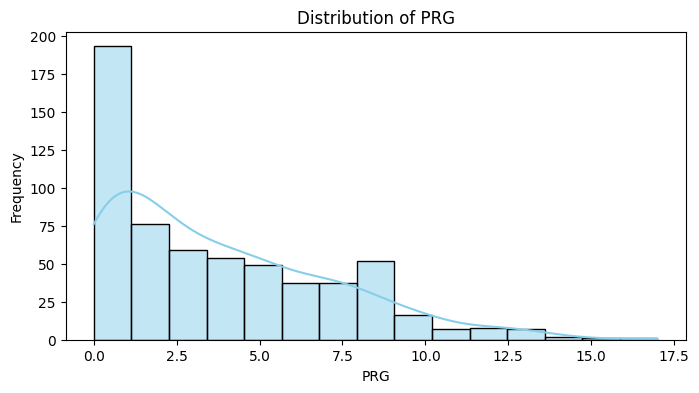

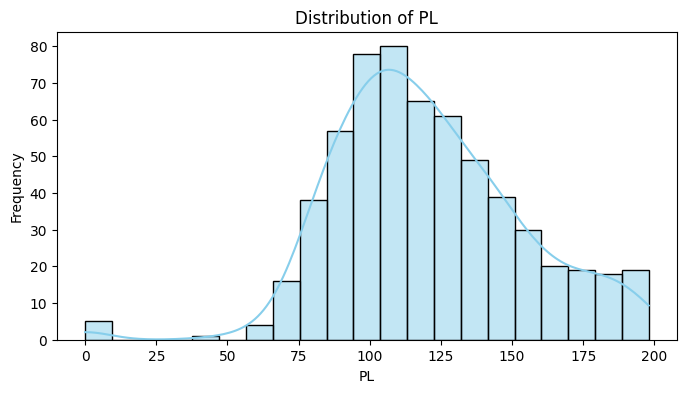

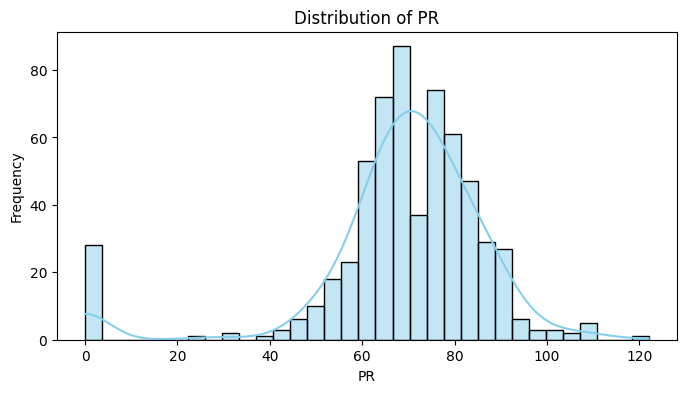

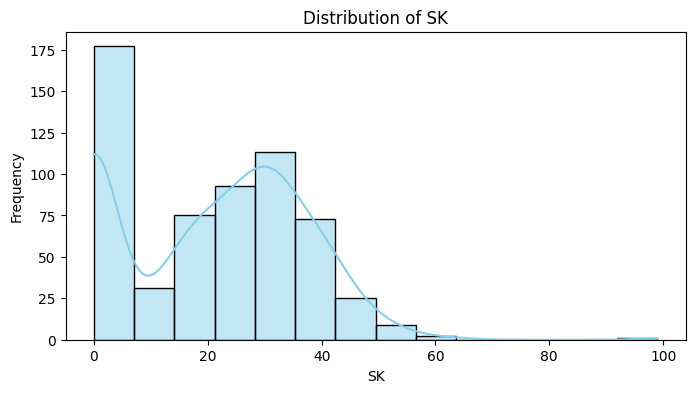

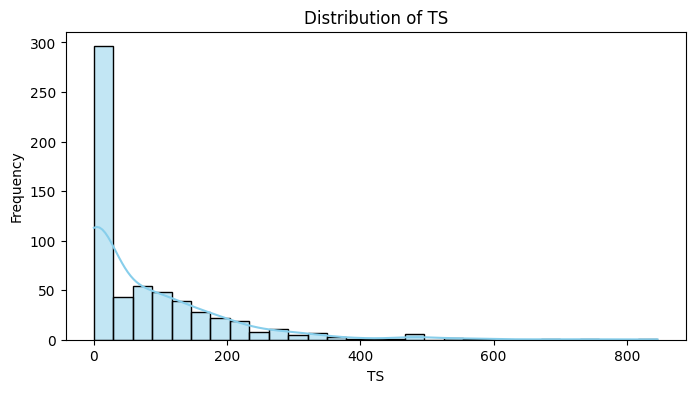

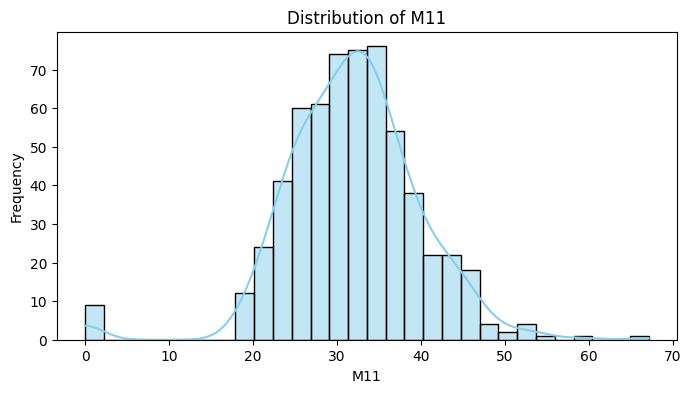

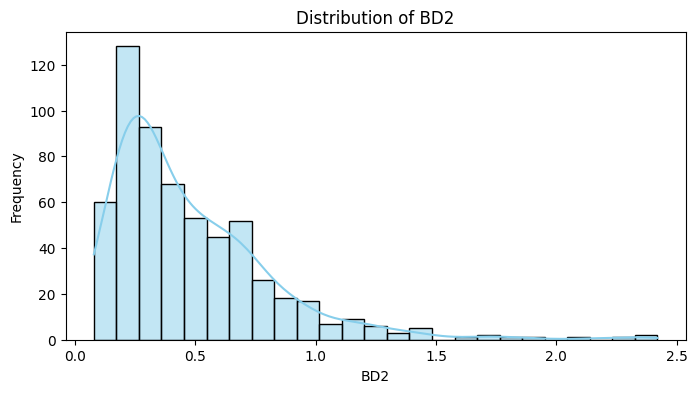

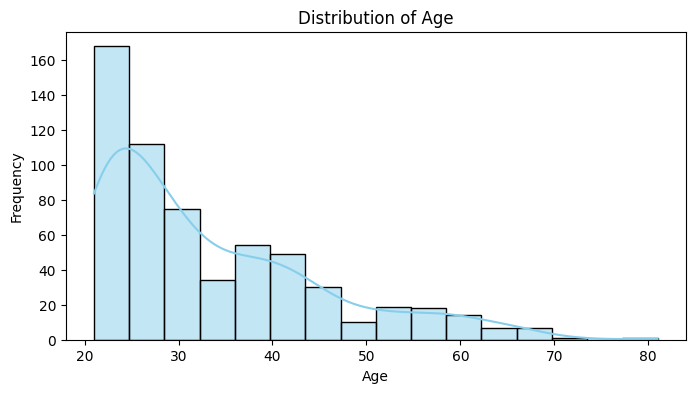

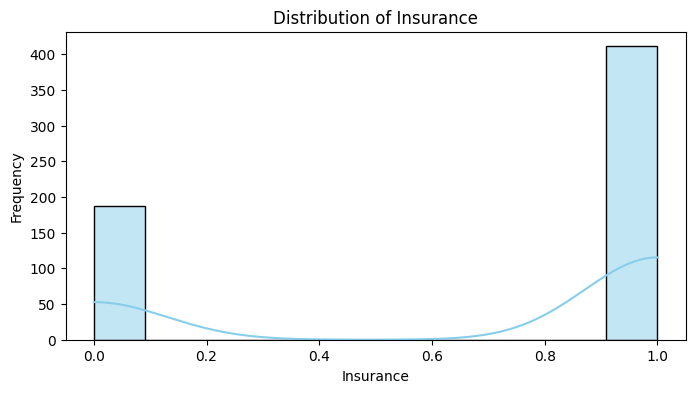

In [10]:
#visualize the numerical columns 
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns

for feature in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature], kde=True, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


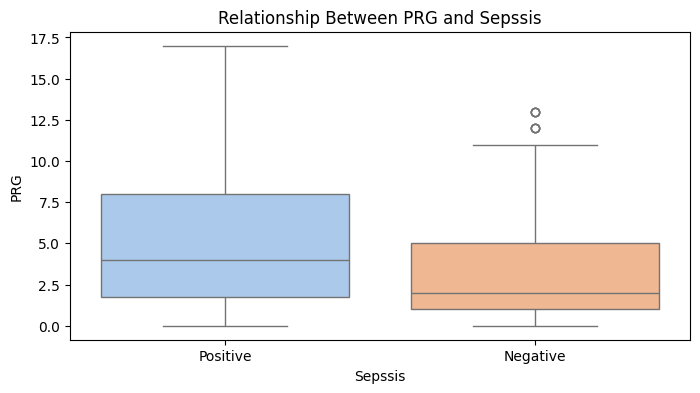

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


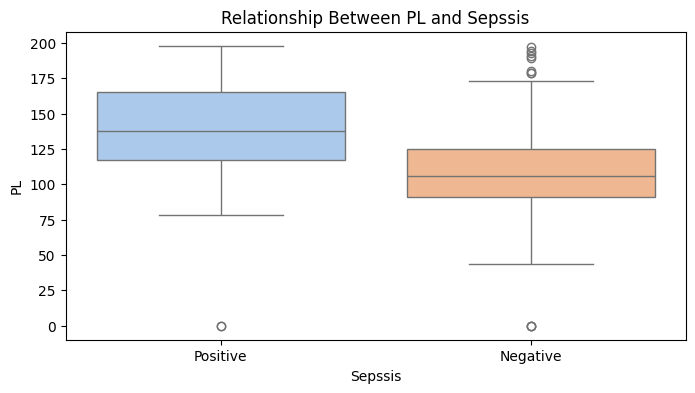

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


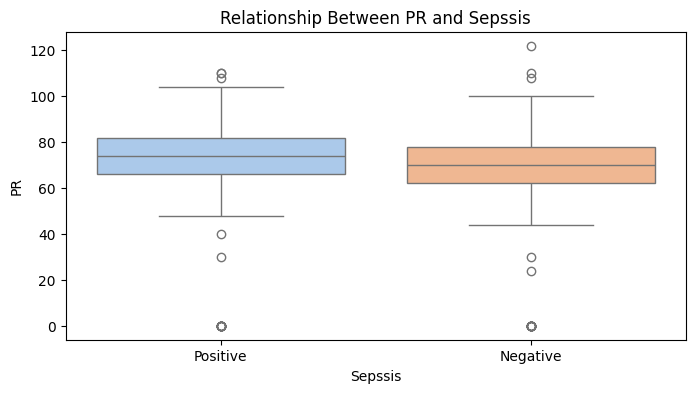

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


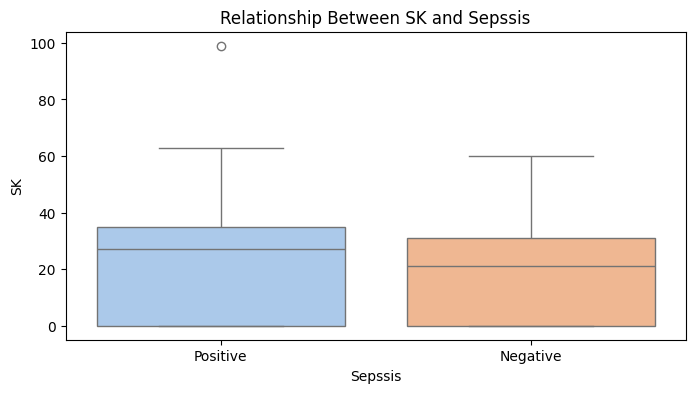

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


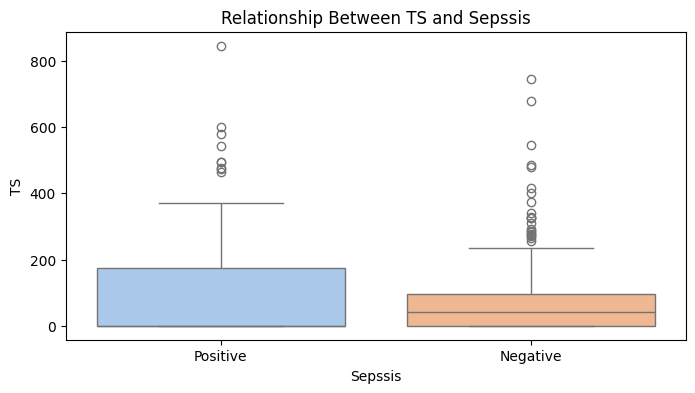

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


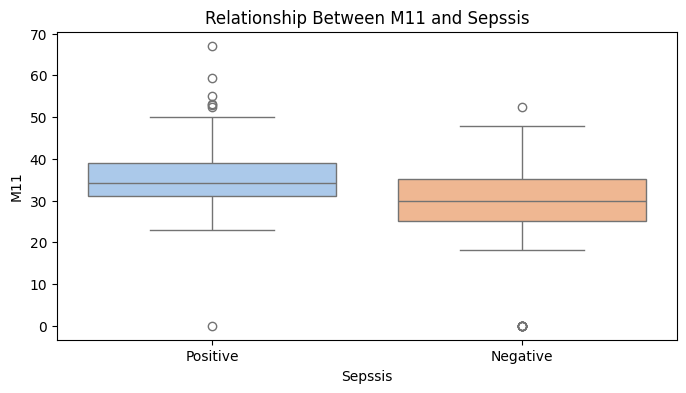

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


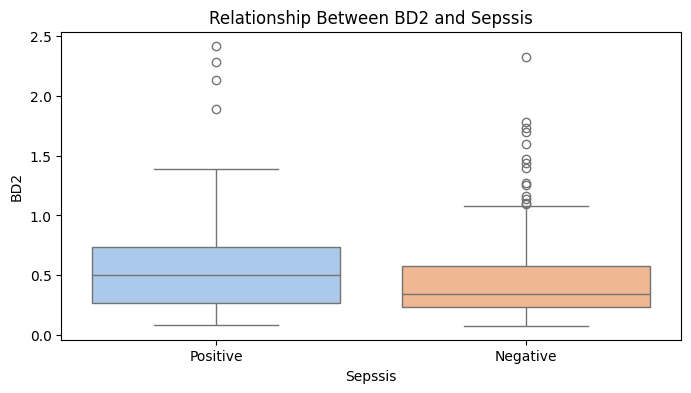

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


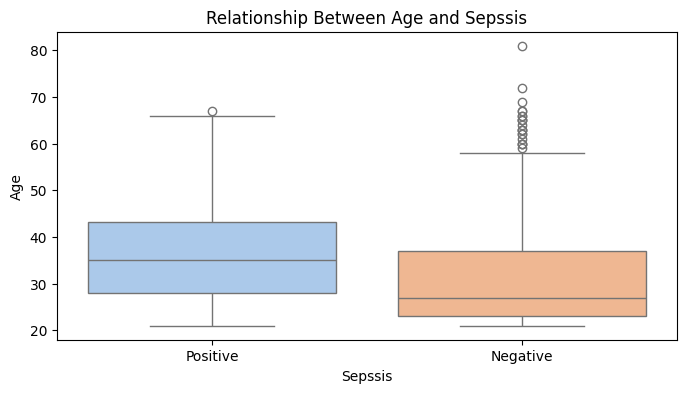

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4000752544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")


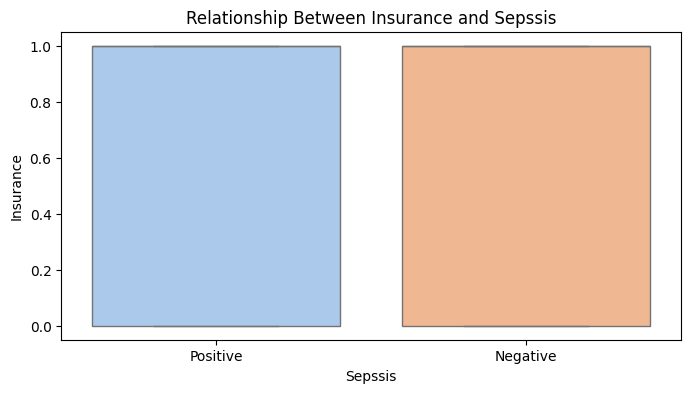

In [11]:
# BIVARIATE ANALYSIS

numerical_features = data.select_dtypes(include=["int64", "float64"]).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="Sepssis", y=feature, data=data, palette="pastel")
    plt.title(f"Relationship Between {feature} and Sepssis")
    plt.xlabel("Sepssis")
    plt.ylabel(feature)
    plt.show()

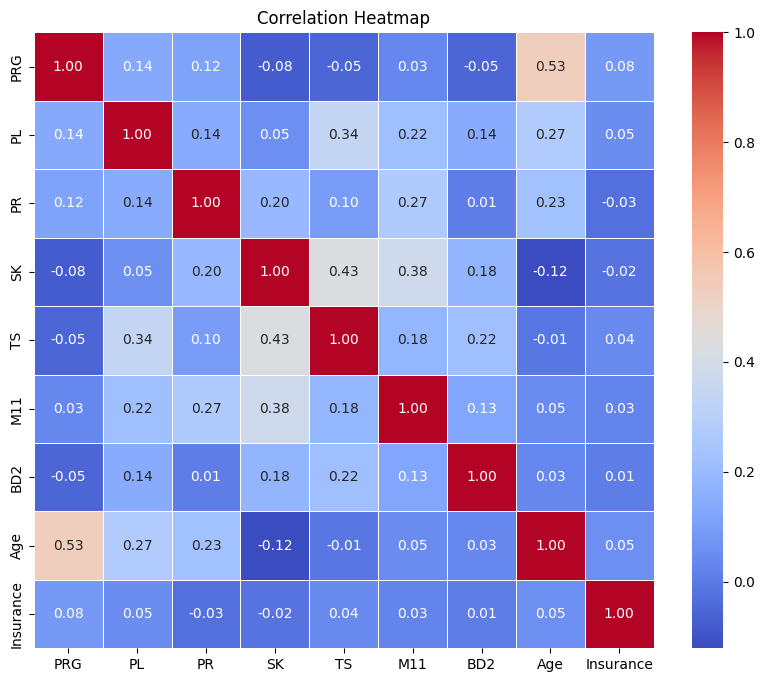

In [12]:
correlation_matrix = (data[numerical_features]).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

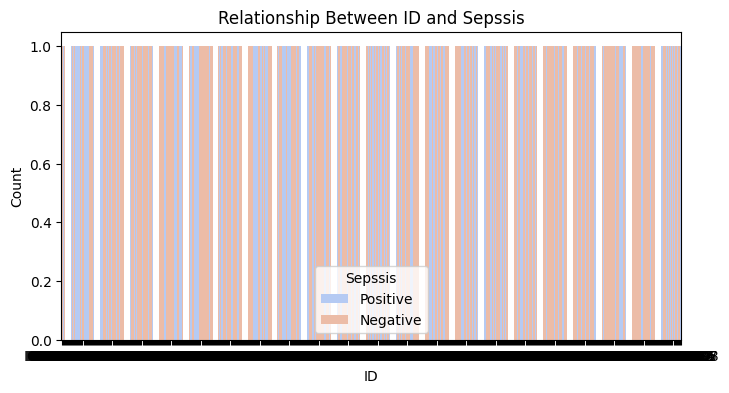

In [13]:
categorical_features = data.select_dtypes(include=["object"]).columns

for feature in categorical_features:
    if feature != "Sepssis":  # Exclude target variable
        plt.figure(figsize=(8, 4))
        sns.countplot(x=feature, hue="Sepssis", data=data, palette="coolwarm")
        plt.title(f"Relationship Between {feature} and Sepssis")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title="Sepssis")
        plt.show()

In [ ]:
# Split data into two groups: Sepsis (1) and Non-Sepsis (0)
sepsis_group = data[data["Sepssis"] == 1]["Age"]
non_sepsis_group = data[data["Sepssis"] == 0]["Age"]

# Perform t-test
t_stat, p_value = ttest_ind(sepsis_group, non_sepsis_group)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value <= 0.05:
    print("Reject the Null Hypothesis: There is no significant correlation between Age and Sepsis.")
else:
    print("Fail to Reject the Null Hypothesis: There is a significant correlation between Age and Sepsis.")


T-statistic: nan
P-value: nan
Fail to Reject the Null Hypothesis: There is a significant correlation between Age and Sepsis.


C:\Users\HP\AppData\Local\Temp\ipykernel_12864\4278898079.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(sepsis_group, non_sepsis_group)


## Business Question

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\1616648865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sepssis', y='PL', data=data, palette='pastel')


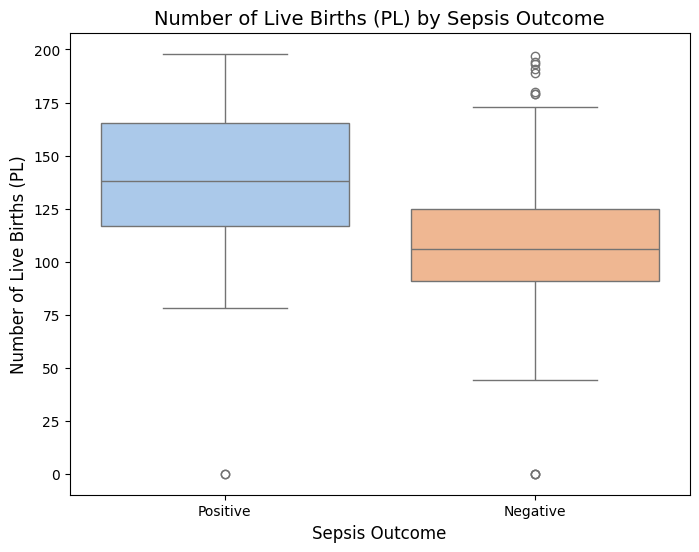

In [15]:
#Question  1: How does the number of live births (PL) vary between Positive and Negative Sepsis outcomes?
 
 
# Creating a boxplot to show the distribution of live births (PL) across Sepsis outcomes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepssis', y='PL', data=data, palette='pastel')
plt.title('Number of Live Births (PL) by Sepsis Outcome', fontsize=14)
plt.xlabel('Sepsis Outcome', fontsize=12)
plt.ylabel('Number of Live Births (PL)', fontsize=12)
plt.show()
 
 

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\3574856457.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sepssis', y='PRG', data=data, palette='muted')


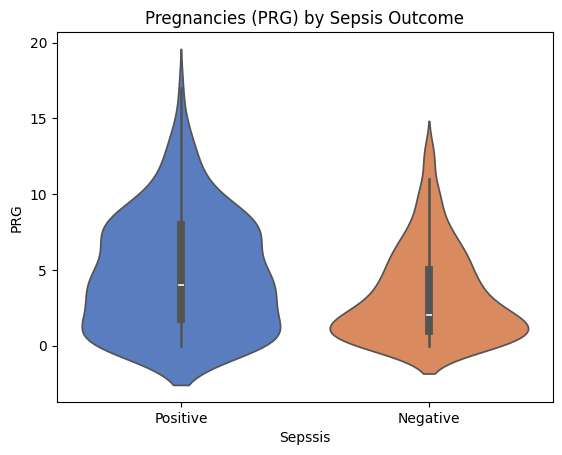

In [16]:
#Question 2: How does the number of pregnancies (PRG) vary between Positive and Negative Sepsis outcomes?
 
sns.violinplot(x='Sepssis', y='PRG', data=data, palette='muted')
plt.title('Pregnancies (PRG) by Sepsis Outcome')
plt.show()

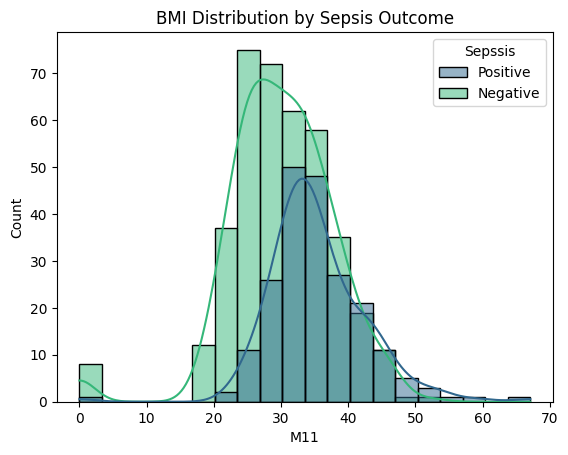

In [17]:
#Question 3:What is the distribution of BMI (M11) for Positive and Negative Sepsis outcomes?
 
sns.histplot(data=data, x='M11', hue='Sepssis', kde=True, palette='viridis', bins=20)
plt.title('BMI Distribution by Sepsis Outcome')
plt.show()

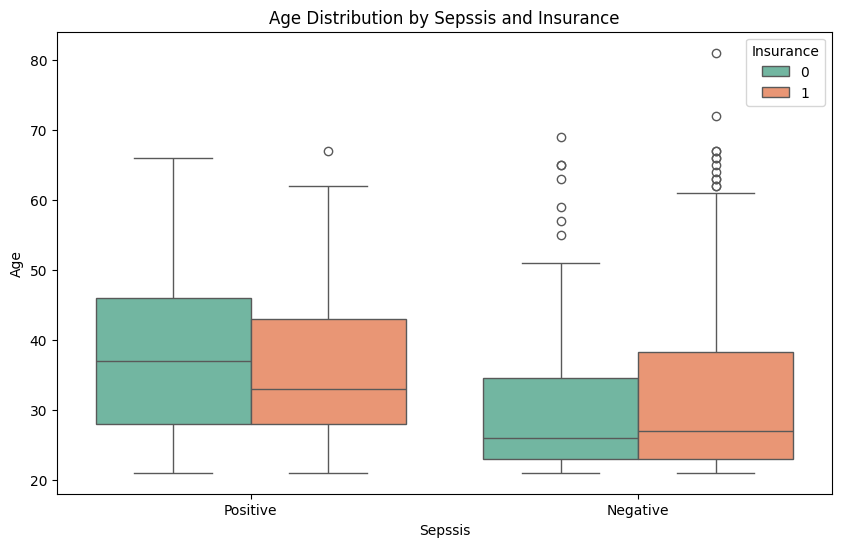

In [18]:
#Question 4: Does insurance status impact the relationship between age and sepsis outcomes?
 
 
# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='Age', hue='Insurance', data=data, palette='Set2')
plt.title('Age Distribution by Sepssis and Insurance')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.legend(title='Insurance')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\3599373222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Sepssis', y='Age', palette='coolwarm')


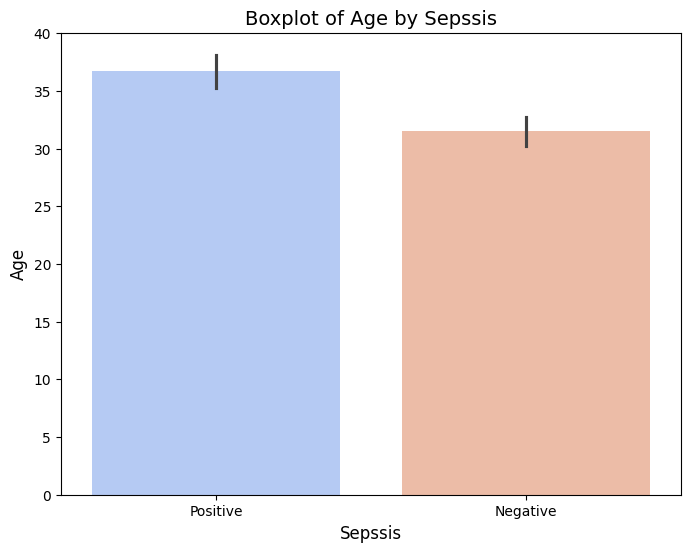

In [19]:
#Questions 5: Is there a relationship between patients' age and the outcome of Sepssis?
 
#visualise the relationship between Age and Sepssis
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sepssis', y='Age', palette='coolwarm')
plt.title('Boxplot of Age by Sepssis', fontsize=14)
plt.xlabel('Sepssis', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

### DATA PREPARATION

In [20]:
# feature engineering
data = data.drop(columns=["ID"])
#data = data.drop(columns=["Sepssis_Encoded"])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [22]:
# data = data.drop(columns=["Sepssis_Encoded"])

In [23]:
# separate features and target varibles
X = data.drop(columns=["Sepssis"])
y = data["Sepssis"] #target column

In [24]:
#split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [25]:
# print(y_train)
# print(y_val)

In [26]:
#!pip install LabelEncoder


In [27]:
# Encode target variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Use fit_transform (not fit_transfomer)
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

print(X_train.shape)
print(X_val.shape)
print(y_train_encoded.shape)
print(y_val_encoded.shape)


(419, 9)
(180, 9)
(419,)
(180,)


In [28]:
#number of features
input_features = X.columns
print(input_features)

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')


In [29]:
#Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("imputer", SimpleImputer(strategy="median"),input_features),  # Handle missing values
    ("outlier_handler", RobustScaler(), input_features),  # Scale robustly to mitigate outliers
    ("scaler", QuantileTransformer(output_distribution="normal", n_quantiles=330), input_features)  # Transform distribution
    ])



In [30]:
#check for multicollinerarity using Variance Inflation factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("variance inflation factor: ")
print(vif_data)


variance inflation factor: 
     feature        VIF
0        PRG   3.226812
1         PL  16.216312
2         PR  14.072380
3         SK   3.933874
4         TS   2.035340
5        M11  18.011167
6        BD2   3.224233
7        Age  13.294282
8  Insurance   3.072380


In [31]:
#PCA
#select only numerical columns
from sklearn.decomposition import PCA

numeric_data = data.select_dtypes(include=["float64", "int64"])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

#initialize PCA with the number of components to keep
pca = PCA(n_components=9)  

#fit PCA to the data and transform
principal_component = pca.fit_transform(scaled_data)

#create a dataframe for the principal components
pca_df = pd.DataFrame(data= principal_component, columns = ["PC1", "PC2","PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9"])

explained_variance = pca.explained_variance_ratio_
print(f"explianed variance ratio: {explained_variance}")

cumlative_variance = explained_variance.cumsum()
print(f"cumlative variance: {cumlative_variance}")

explianed variance ratio: [0.2313302  0.19066612 0.12146057 0.10854176 0.0932426  0.08437071
 0.07797801 0.04691597 0.04549405]
cumlative variance: [0.2313302  0.42199632 0.54345689 0.65199865 0.74524125 0.82961197
 0.90758998 0.95450595 1.        ]


In [32]:
#Modeling

models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 5),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42),
}


In [33]:
print(X_val)

     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
444    4  117  62  12    0  29.7  0.380   30          1
554    1   84  64  23  115  36.9  0.471   28          1
62     5   44  62   0    0  25.0  0.587   36          1
258    1  193  50  16  375  25.9  0.655   24          1
305    2  120  76  37  105  39.7  0.215   29          0
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
428    0  135  94  46  145  40.6  0.284   26          0
298   14  100  78  25  184  36.6  0.412   46          1
392    1  131  64  14  415  23.7  0.389   21          0
189    5  139  80  35  160  31.6  0.361   25          0
594    6  123  72  45  230  33.6  0.733   34          0

[180 rows x 9 columns]


In [34]:
#using pipeline
from sklearn.pipeline import Pipeline

results_table = pd.DataFrame(columns=["name", "accuracy", "precision", "recall", "f1_score"])
all_pipelines = {}

#imbalanced class
for name, model in models.items():
    pipeline = Pipeline(steps=[
                ("preprocessor", preprocessor), #preprocessor features
                ("pca", PCA(n_components = 7)), #reduce dimensions
                ("model", model)  #add the classfier

    ])
    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_val)

    metrics = classification_report(y_val_encoded, y_pred, output_dict=True)

    all_pipelines[name] = pipeline

    #pick values from metrics dict
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"] ["recall"]
    f1 = metrics["weighted avg"] ["f1-score"]

    #add the value to the result table
    results_table.loc[len(results_table)] = [name, accuracy, precision, recall, f1]

#sort the table with f1 score
results_table = results_table.sort_values("f1_score", ascending=False)

#show results
print("results")
print(results_table)

results
                  name  accuracy  precision    recall  f1_score
0  Logistic Regression  0.777778   0.773382  0.777778  0.773918
2        Random Forest  0.766667   0.762222  0.766667  0.755556
1  K-Nearest Neighbors  0.727778   0.720767  0.727778  0.722349


In [35]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Import imblearn's Pipeline
from imblearn.over_sampling import SMOTE

In [36]:
 #Balanced class


balanced_results_table = pd.DataFrame(columns=["name", "accuracy", "precision", "recall", "f1_score"])
balanced_pipelines = {}

for name, model in models.items():
    pipeline = ImbPipeline(steps=[
                ("preprocessor", preprocessor), #feature preprocessing
                ("smote_sampler", SMOTE(random_state=42)), #handling class imbalnce
                ("pca", PCA(n_components=7)), #reduce dimensions
                ("model", model)  #model
    ])


    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_val)

    balanced_metrics = classification_report(y_val_encoded, y_pred, output_dict=True)

    balanced_pipelines[name] = pipeline
    accuracy = balanced_metrics["accuracy"]
    precision = balanced_metrics["weighted avg"]["precision"]
    recall = balanced_metrics["weighted avg"] ["recall"]
    f1 = balanced_metrics["weighted avg"] ["f1-score"]

    #add the value to the result table
    balanced_results_table.loc[len(balanced_results_table)] = [name, accuracy, precision, recall, f1]

#sort the table with f1 score
balanced_results_table = balanced_results_table.sort_values("f1_score", ascending=False)

#show results
print(" Balanced results")
print(balanced_results_table)

 Balanced results
                  name  accuracy  precision    recall  f1_score
0  Logistic Regression  0.750000   0.766447  0.750000  0.754338
2        Random Forest  0.755556   0.752430  0.755556  0.753602
1  K-Nearest Neighbors  0.666667   0.701176  0.666667  0.674146


In [37]:
# #Hyperparameter tuning

param_grid = {
    "Logistic Regression": {
        "model__C": [0.1, 1, 10],
        "model__solver": ["lbfgs", "liblinear"]
    },
    "K-Nearest Neighbors": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"]
    },
    "Random Forest": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20]
    }
}

#create a stratifiedkfold object
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=42)

tuned_models_df = pd.DataFrame(columns=["name", "accuracy", "precision", "recall", "f1_score"])

all_pipelines = {}

#perfom hyperparameter tuning for each model
for name, model in models.items():
    print(f"tuning hyperparameter for: {name}")

#     #create the pipeline
    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])


    #GridSearchCV
    grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid[name],
    cv = skf,
    scoring = ["f1_weighted", "f1", "accuracy", "precision", "recall"],
    refit = "f1_weighted",
    n_jobs = -1
)

    #  #fit grid search on training data
    grid_search.fit(X_train, y_train_encoded)

    #update the parameters to the pipeline
    best_pipeline = grid_search.best_estimator_
    all_pipelines[name] = best_pipeline

    # #predict with the tunned model (use the validation set)
    y_pred = best_pipeline.predict(X_val)

    #store result
    tuned_metrics = classification_report(y_val_encoded, y_pred, output_dict = True)


    #picking values from metrics dict
    accuracy = tuned_metrics["accuracy"]
    precision = tuned_metrics["weighted avg"]["precision"]
    recall = tuned_metrics["weighted avg"] ["recall"]
    f1 = tuned_metrics["weighted avg"] ["f1-score"]


#     #add the value to the result table
    tuned_models_df.loc[len(tuned_models_df)] = [name, accuracy, precision, recall, f1]

#sort the table with f1 score
tuned_models_df.sort_values("f1_score", ascending= False).reset_index(drop=True)
print("tunned results:")
print(tuned_models_df)

# #features used in training
# print("training features:", preprocessor.get_feature_names_out())

tuning hyperparameter for: Logistic Regression
tuning hyperparameter for: K-Nearest Neighbors
tuning hyperparameter for: Random Forest
tunned results:
                  name  accuracy  precision    recall  f1_score
0  Logistic Regression  0.766667   0.761818  0.766667  0.762614
1  K-Nearest Neighbors  0.727778   0.719000  0.727778  0.719283
2        Random Forest  0.761111   0.755198  0.761111  0.755049


In [38]:
#features used in training
print("training features:", preprocessor.get_feature_names_out())

training features: ['imputer__PRG' 'imputer__PL' 'imputer__PR' 'imputer__SK' 'imputer__TS'
 'imputer__M11' 'imputer__BD2' 'imputer__Age' 'imputer__Insurance'
 'outlier_handler__PRG' 'outlier_handler__PL' 'outlier_handler__PR'
 'outlier_handler__SK' 'outlier_handler__TS' 'outlier_handler__M11'
 'outlier_handler__BD2' 'outlier_handler__Age'
 'outlier_handler__Insurance' 'scaler__PRG' 'scaler__PL' 'scaler__PR'
 'scaler__SK' 'scaler__TS' 'scaler__M11' 'scaler__BD2' 'scaler__Age'
 'scaler__Insurance']


In [39]:
# use and load the test set
test_set = pd.read_csv(r"C:\Users\HP\Desktop\API\API_PROJECT\data\Paitients_Files_Test.csv")
#test_set = pd.read_csv(r"C:\Users\HP\Desktop\API\API_PROJECT\kagglehub\datasets\chaunguynnghunh\sepsis\versions\2\Paitients_Files_Test.csv")



In [40]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [41]:
# Save the dataset to a new file
# test_set.to_csv(r"C:\Users\HP\Desktop\API\API_PROJECT\kagglehub\datasets\chaunguynnghunh\sepsis\versions\2\Paitients_Files_Test_Saved.csv", index=False)


In [42]:
# test_set = test_set.drop(columns=["ID"])


In [43]:
#initialize prediciton dictionary
test_prediction = {}

for name, pipeline in all_pipelines.items():
    print(f"generate predictions for Test set: {name}")
    y_test_pred = pipeline.predict(test_set)
    y_test_prob = pipeline.predict_proba(test_set)[:, 1]

    #store predicitons
    test_prediction[name] = {
        "predictions": y_test_pred,
        "probabilities": y_test_prob
    }

#display predictions for each model
for name, preds in test_prediction.items():
    print(f"prediciton for {name}:")
    print(preds["predictions"])
    # print(f"probabilities for {name} (if applicable):")
    # print(preds["probabilities"])


generate predictions for Test set: Logistic Regression
generate predictions for Test set: K-Nearest Neighbors
generate predictions for Test set: Random Forest
prediciton for Logistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
prediciton for K-Nearest Neighbors:
[0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0]
prediciton for Random Forest:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 

In [44]:
import joblib

In [45]:
# import os
# import joblib

# # Ensure the directory exists
# os.makedirs("models", exist_ok=True)

# # Save the pipelines
# for name, pipeline in all_pipelines.items():
#     joblib.dump(pipeline, f"models\\{name}_pipeline.pkl")


In [46]:
# save the pipeline
for name, pipeline in all_pipelines.items():
    joblib.dump(pipeline, f"models/{name}_pipeline.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'models/Logistic Regression_pipeline.pkl'

In [ ]:
test_set.to_csv("data/test_set.csv", index=False)